In [2]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyteomics import mass, parser
tqdm.pandas()

# ionbot

In [3]:
data = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/From_scratch/ionbotvcomet.tsv", sep="\t")
data.columns
data = data.filter(["Spectrum File", "Scan", "precursor_mass", "ionbot Sequence","ionbot_mods_formatted", "Comet Raw Sequence", "comet_mods_formatted", "ionbot_seq_eval", "ionbot_mods_eval", "ionbot peptide mass", "comet peptide mass", "ionbot PEP", "Comet PEP", "Fragger PEP", "pFind q-value"])

In [4]:
data.head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
0,131023_Sunil_PPT_Brain_A_01,10259.0,1489.73325,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.00078,0.000705,0.0000,0.0
1,131023_Sunil_PPT_Brain_A_01,10369.0,1489.73289,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.00066,0.000723,0.0002,0.0
2,131023_Sunil_PPT_Brain_A_01,10513.0,2266.00275,GAGQGPITEDMLCAGYLEGER,['methylmalonylation'],SAYPGQITSNMFCAGYLEGGK,"['carbamidomethyl', 'oxidation']",False,Different modifications,2265.98816,2208.9771,0.03493,0.018425,0.0023,0.0
3,131023_Sunil_PPT_Brain_A_01,10677.0,1489.73355,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.01455,0.004303,0.0215,0.0
4,131023_Sunil_PPT_Brain_A_01,10820.0,1489.72915,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.02879,0.068760,0.0266,0.0


In [5]:
#Same sequence, different modification
ssdm = data[(data["ionbot_seq_eval"] == True) & (data["ionbot_mods_eval"] == "Different modifications")]
g1 = ssdm.groupby(["comet_mods_formatted", "ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False)
g1

Spectrum File  \
comet_mods_formatted                               ionbot_mods_formatted                                               
['carbamidomethyl', 'methyl']                      ['propionamide']                                              237   
['acetyl']                                         ['delta:h(2)c(2)', 'oxidation']                               188   
['carbamidomethyl', 'carbamidomethyl']             ['carbamidomethyl', 'gly']                                    184   
['carbamidomethyl']                                ['carbamidomethyl', 'deamidated']                              92   
['carbamidomethyl', 'carbamidomethyl', 'carbami... ['carbamidomethyl', 'dicarbamidomethyl']                       82   
...                                                                                                              ...   
['carbamidomethyl', 'carbamidomethyl', 'oxidati... ['carbamidomethyl[c]|4|[4]carbamidomethyl', 'ox...              1   
                                                   ['carbamidomethyl[c]|10|[4]carbamidomethyl', 'o...              1   
                                                   ['carbamidomethyl', 'oxidation[m]|16|[6]carboxy...              1   
                                                   ['carbamidomethyl', 'oxidation[m]|11|[1263]gly']                1   
['oxidation']                                      ['oxidation', 'oxidation[m]|9|[447]deoxy']                      1   

                                                                                                       Scan  \
comet_mods_formatted                               ionbot_mods_formatted                                      
['carbamidomethyl', 'methyl']                      ['propionamide']                                     237   
['acetyl']                                         ['delta:h(2)c(2)', 'oxidation']                      188   
['carbamidomethyl', 'carbamidomethyl']             ['carbamidomethyl', 'gly']                           184   
['carbamidomethyl']                                ['carbamidomethyl', 'deamidated']                     92   
['carbamidomethyl', 'carbamidomethyl', 'carbami... ['carbamidomethyl', 'dicarbamidomethyl']              82   
...                                                                                                     ...   
['carbamidomethyl', 'carbamidomethyl', 'oxidati... ['carbamidomethyl[c]|4|[4]carbamidomethyl', 'ox...     1   
                                                   ['carbamidomethyl[c]|10|[4]carbamidomethyl', 'o...     1   
                                                   ['carbamidomethyl', 'oxidation[m]|16|[6]carboxy...     1   
                                                   ['carbamidomethyl', 'oxidation[m]|11|[1263]gly']       1   
['oxidation']                                      ['oxidation', 'oxidation[m]|9|[447]deoxy']             1   

                                                                                                       precursor_mass  \
comet_mods_formatted                               ionbot_mods_formatted                                                
['carbamidomethyl', 'methyl']                      ['propionamide']                                               237   
['acetyl']                                         ['delta:h(2)c(2)', 'oxidation']                                188   
['carbamidomethyl', 'carbamidomethyl']             ['carbamidomethyl', 'gly']                                     184   
['carbamidomethyl']                                ['carbamidomethyl', 'deamidated']                               92   
['carbamidomethyl', 'carbamidomethyl', 'carbami... ['carbamidomethyl', 'dicarbamidomethyl']                        82   
...                                                                                                               ...   
['carbamidomethyl', 'carbamidomethyl', 'oxidati... ['carbamidomethyl[c]|4|[4]carbamidomethyl', 'ox...               1   
         

In [11]:
ssdm.head(8)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
13,131023_Sunil_PPT_Brain_A_01,12539.0,2250.00835,SAYPGQITSNMFCAGYLEGGK,"['azidof', 'oxidation']",SAYPGQITSNMFCAGYLEGGK,['carbamidomethyl'],True,Different modifications,2249.98336,2192.9871,0.00757,0.044939,0.0510,0.0
14,131023_Sunil_PPT_Brain_A_01,12785.0,2665.28182,VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'gly']",VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl']",True,Different modifications,2665.28400,2551.2410,0.00085,0.005384,0.1124,0.0
32,131023_Sunil_PPT_Brain_A_02,11389.0,2665.28515,VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'gly']",VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl']",True,Different modifications,2665.28400,2551.2410,0.00000,0.000001,0.0000,0.0
33,131023_Sunil_PPT_Brain_A_02,11478.0,2665.28212,VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'gly']",VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl']",True,Different modifications,2665.28400,2551.2410,0.00001,0.000072,0.0000,0.0
34,131023_Sunil_PPT_Brain_A_02,11500.0,2665.28535,VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'gly']",VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl']",True,Different modifications,2665.28400,2551.2410,0.00181,0.006755,0.0038,0.0
36,131023_Sunil_PPT_Brain_A_02,11587.0,2665.27972,VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'gly']",VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl']",True,Different modifications,2665.28400,2551.2410,0.00002,0.000973,0.0000,0.0
37,131023_Sunil_PPT_Brain_A_02,11691.0,2666.28475,VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carboxymethyl']",VASISLPTSCASAGTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl']",True,Different modifications,2666.26800,2551.2410,0.00013,0.018296,0.0002,0.0
81,131023_Sunil_PPT_Brain_A_03,12892.0,1490.72422,LQGIVSWGSGCAQK,"['carbamidomethyl', 'deamidated']",LQGIVSWGSGCAQK,['carbamidomethyl'],True,Different modifications,1490.71872,1432.7133,0.00004,0.022864,0.0001,0.0


In [12]:
#Same sequence, newly modified
ssnm = data[(data["ionbot_seq_eval"] == True) & (data["ionbot_mods_eval"] == "Newly modified")]
ssnm.groupby(["ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
ionbot_mods_formatted,,,,,,,,,,,,,,
['deamidated'],446,446,446,446,446,0,446,446,446,446,446,446,446,446
"['deoxy', 'oxidation']",147,147,147,147,147,0,147,147,147,147,147,147,147,147
"['oxidation', 'ser->lacticacid']",1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [17]:
ssnm.head(13)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
5,131023_Sunil_PPT_Brain_A_01,10824.0,2211.09664,LGEHNIDVLEGNEQFINAAK,['deamidated'],LGEHNIDVLEGNEQFINAAK,NaN,True,Newly modified,2211.08064,2210.0967,0.00063,0.000797,0.0000,0.000000
170,131023_Sunil_PPT_Brain_A_04,12373.0,2273.14182,SIVHPSYNSNTLNNDIMLIK,['deamidated'],SIVHPSYNSNTLNNDIMLIK,NaN,True,Newly modified,2273.13616,2272.1522,0.00730,0.021346,0.0004,0.000000
173,131023_Sunil_PPT_Brain_A_04,12512.0,2273.14138,SIVHPSYNSNTLNNDIMLIK,['deamidated'],SIVHPSYNSNTLNNDIMLIK,NaN,True,Newly modified,2273.13616,2272.1522,0.00007,0.000024,0.0000,0.000000
181,131023_Sunil_PPT_Brain_A_04,13388.0,2273.13172,SIVHPSYNSNTLNNDIMLIK,['deamidated'],SIVHPSYNSNTLNNDIMLIK,NaN,True,Newly modified,2273.13616,2272.1522,0.00004,0.000902,0.0066,0.000000
187,131023_Sunil_PPT_Brain_A_04,13786.0,2282.17252,IITHPNFNGNTLDNDIMLIK,"['deoxy', 'oxidation']",IITHPNFNGNTLDNDIMLIK,NaN,True,Newly modified,2282.17296,2282.1729,0.04348,0.000015,0.0000,0.000000
198,131023_Sunil_PPT_Brain_A_04,15121.0,2283.15202,IITHPNFNGNTLDNDIMLIK,['deamidated'],IITHPNFNGNTLDNDIMLIK,NaN,True,Newly modified,2283.15680,2282.1729,0.00627,0.025505,0.0653,0.000000
244,131023_Sunil_PPT_Brain_A_04,18710.0,1409.72373,VDFSLAGALNAGFK,['deamidated'],VDFSLAGALNAGFK,NaN,True,Newly modified,1409.71904,1408.7350,0.00000,0.016132,0.0147,0.000000
245,131023_Sunil_PPT_Brain_A_04,18716.0,1806.91604,NIETIINTFHQYSVK,['deamidated'],NIETIINTFHQYSVK,NaN,True,Newly modified,1806.91520,1805.9312,0.00003,0.024440,0.0002,0.000000
264,131023_Sunil_PPT_Brain_A_04,20119.0,1631.89755,SMLDQLGVPLYAVVK,"['deoxy', 'oxidation']",SMLDQLGVPLYAVVK,NaN,True,Newly modified,1631.89568,1631.8956,0.00275,0.017833,0.0010,0.000088
277,131023_Sunil_PPT_Brain_A_04,22991.0,1810.98475,NAPAIIFIDELDAIAPK,['deamidated'],NAPAIIFIDELDAIAPK,NaN,True,Newly modified,1810.97152,1809.9876,0.00000,0.000002,0.0000,0.000000


In [18]:
#Same sequence, no longer modified
ssnlm = data[(data["ionbot_seq_eval"] == True) & (data["ionbot_mods_eval"] == "No longer modified")]
ssnlm.groupby(["comet_mods_formatted"]).count().sort_values("Scan", ascending=False)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
comet_mods_formatted,,,,,,,,,,,,,,
['deamidated'],76,76,76,76,0,76,76,76,76,76,76,76,76,76
"['deamidated', 'deamidated']",2,2,2,2,0,2,2,2,2,2,2,2,2,2


In [22]:
ssnlm.head(40)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
160,131023_Sunil_PPT_Brain_A_04,10951.0,1719.96202,KLNQALLDLHALGSAR,NaN,KLNQALLDLHALGSAR,['deamidated'],True,No longer modified,1718.97910,1719.9591,0.00013,7.641515e-02,0.0022,0.000000
268,131023_Sunil_PPT_Brain_A_04,21815.0,2582.24422,VGAHAGEYGAEALERMFLSFPTTK,NaN,VGAHAGEYGAEALERMFLSFPTTK,['deamidated'],True,No longer modified,2581.26344,2582.2435,0.00423,3.318648e-08,0.0000,0.000000
270,131023_Sunil_PPT_Brain_A_04,21843.0,2582.24155,VGAHAGEYGAEALERMFLSFPTTK,NaN,VGAHAGEYGAEALERMFLSFPTTK,['deamidated'],True,No longer modified,2581.26344,2582.2435,0.01526,5.013628e-04,0.0002,0.000000
272,131023_Sunil_PPT_Brain_A_04,21931.0,2582.24482,VGAHAGEYGAEALERMFLSFPTTK,NaN,VGAHAGEYGAEALERMFLSFPTTK,['deamidated'],True,No longer modified,2581.26344,2582.2435,0.00201,2.744084e-06,0.0002,0.000000
276,131023_Sunil_PPT_Brain_A_04,22472.0,2582.23672,VGAHAGEYGAEALERMFLSFPTTK,NaN,VGAHAGEYGAEALERMFLSFPTTK,['deamidated'],True,No longer modified,2581.26344,2582.2435,0.00150,4.477698e-06,0.0001,0.000000
364,131023_Sunil_PPT_Brain_A_05,20541.0,2582.24782,VGAHAGEYGAEALERMFLSFPTTK,NaN,VGAHAGEYGAEALERMFLSFPTTK,['deamidated'],True,No longer modified,2581.26344,2582.2435,0.02981,9.428292e-03,0.0002,0.000000
367,131023_Sunil_PPT_Brain_A_05,7321.0,1491.80392,NIVTPRTPPPSQGK,NaN,NIVTPRTPPPSQGK,['deamidated'],True,No longer modified,1490.82049,1491.8005,0.00483,5.569981e-02,0.0243,0.000349
402,131023_Sunil_PPT_Brain_A_06,4260.0,1687.85007,ATRSGAQASSTPLSPTR,NaN,ATRSGAQASSTPLSPTR,['deamidated'],True,No longer modified,1686.86487,1687.8449,0.00002,7.849503e-03,0.0016,0.000000
508,131023_Sunil_PPT_Brain_A_09,18318.0,2180.07107,RGTGGVDTAATGGVFDISNLDR,NaN,RGTGGVDTAATGGVFDISNLDR,['deamidated'],True,No longer modified,2178.06646,2179.0465,0.00003,8.660974e-03,0.0000,0.000000
537,131023_Sunil_PPT_Brain_A_09,19801.0,3008.52810,VELSEQQLQLWPSDVDKLSPTDNLPR,NaN,VELSEQQLQLWPSDVDKLSPTDNLPR,['deamidated'],True,No longer modified,3006.52978,3007.5098,0.00010,4.463717e-03,0.0000,0.000000


In [23]:
#Different sequence, Different modifications
dsdm = data[(data["ionbot_seq_eval"] == False) & (data["ionbot_mods_eval"] == "Different modifications")]
dsdm.groupby(["comet_mods_formatted", "ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,,Spectrum File,Scan,precursor_mass,ionbot Sequence,Comet Raw Sequence,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
comet_mods_formatted,ionbot_mods_formatted,,,,,,,,,,,,,
['carbamidomethyl'],['gly->asn'],254,254,254,254,254,254,254,254,254,254,254,254,254
"['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamyl']",52,52,52,52,52,52,52,52,52,52,52,52,52
['oxidation'],"['methyl', 'oxidation']",42,42,42,42,42,42,42,42,42,42,42,42,42
['carbamidomethyl'],"['carbamidomethyl', 'deamidated']",18,18,18,18,18,18,18,18,18,18,18,18,18
['methyl'],['acetyl'],13,13,13,13,13,13,13,13,13,13,13,13,13


In [37]:
dsdm.head(140)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
0,131023_Sunil_PPT_Brain_A_01,10259.0,1489.73325,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.00078,0.000705,0.0000,0.0
1,131023_Sunil_PPT_Brain_A_01,10369.0,1489.73289,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.00066,0.000723,0.0002,0.0
2,131023_Sunil_PPT_Brain_A_01,10513.0,2266.00275,GAGQGPITEDMLCAGYLEGER,['methylmalonylation'],SAYPGQITSNMFCAGYLEGGK,"['carbamidomethyl', 'oxidation']",False,Different modifications,2265.98816,2208.9771,0.03493,0.018425,0.0023,0.0
3,131023_Sunil_PPT_Brain_A_01,10677.0,1489.73355,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.01455,0.004303,0.0215,0.0
4,131023_Sunil_PPT_Brain_A_01,10820.0,1489.72915,LQGIVSWGSNCAQK,['gly->asn'],LQGIVSWGSGCAQK,['carbamidomethyl'],False,Different modifications,1489.73472,1432.7133,0.02879,0.068760,0.0266,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,131023_Sunil_PPT_Brain_A_04,14753.0,1002.54893,IGLFGGAGVGK,['formyl'],VVMLGAGGVGK,['oxidation'],False,Different modifications,1002.54976,1002.5483,0.00099,0.004065,0.0027,0.0
204,131023_Sunil_PPT_Brain_A_04,15684.0,2582.19202,FSTMPFMFCNINNVCNFASR,"['carbamidomethyl', 'carbamidomethyl[c]|2|[426...",KFSTMPFLFCNINNVCNFASR,"['carbamidomethyl', 'carbamidomethyl', 'oxidat...",False,Different modifications,2582.15792,2468.1390,0.01015,0.000055,0.0000,0.0
212,131023_Sunil_PPT_Brain_A_04,16492.0,2723.31772,VASISLPTSCASADTQCLISGWGNTK,"['carbamidomethyl', 'carbamidomethyl[c]|14|gly...",LTTPTYGDLNHLVSATMSGVTTCLR,"['carbamidomethyl', 'oxidation']",False,Different modifications,2723.28960,2666.2995,0.00029,0.000001,0.0000,0.0
213,131023_Sunil_PPT_Brain_A_04,16587.0,2620.31662,LTTPTYGDLNHLVSATMSGVTTSLR,"['oxidation', 'pro->pyrrolidinone']",LATPTYGDLNHLVSATMSGVTTSLR,['oxidation'],False,Different modifications,2620.31664,2620.3117,0.00000,0.000002,0.0000,0.0


In [38]:
#Different sequence, Newly modified
dsnm = data[(data["ionbot_seq_eval"] == False) & (data["ionbot_mods_eval"] == "Newly modified")]
dsnm.groupby(["ionbot_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
ionbot_mods_formatted,,,,,,,,,,,,,,
['carbamidomethyl'],55,55,55,55,55,0,55,55,55,55,55,55,55,55
['formyl'],32,32,32,32,32,0,32,32,32,32,32,32,32,32
['methyl'],30,30,30,30,30,0,30,30,30,30,30,30,30,30
['met->aspsa'],29,29,29,29,29,0,29,29,29,29,29,29,29,29
['oxidation'],29,29,29,29,29,0,29,29,29,29,29,29,29,29


In [39]:
dsnm.head(10)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
163,131023_Sunil_PPT_Brain_A_04,11206.0,944.53110,IGILITDGK,['carboxy->thiocarboxy'],IWILTGDK,NaN,False,Newly modified,944.53640,944.5331,0.05327,0.059904,0.0435,0.001318
166,131023_Sunil_PPT_Brain_A_04,11330.0,1339.76926,GLGIETVSKTPLK,['didehydro'],LGGSAVISLEGKPL,NaN,False,Newly modified,1339.77104,1339.7711,0.01225,0.000035,0.0012,0.000000
201,131023_Sunil_PPT_Brain_A_04,15641.0,1560.84595,KVESLQEEIAFLK,['formyl'],RIESLNEEIAFLK,NaN,False,Newly modified,1560.83984,1560.8511,0.00001,0.055407,0.0000,0.000000
294,131023_Sunil_PPT_Brain_A_04,5809.0,1462.74692,AAQLCGAGMAAVVDK,['carbamidomethyl'],SQFTITPGSEQIR,NaN,False,Newly modified,1460.71152,1462.7416,0.00130,0.000685,0.0080,0.000088
317,131023_Sunil_PPT_Brain_A_04,9760.0,1255.69358,FFLCQVAGDAK,['carbamidomethyl'],IYVGNLPPDIR,NaN,False,Newly modified,1254.60668,1255.6924,0.00055,0.054619,0.0102,0.000000
340,131023_Sunil_PPT_Brain_A_05,15669.0,1614.82969,AVLVDLEPGTMDSVR,['methyl'],AILVDLEPGTMDSVR,NaN,False,Newly modified,1614.82864,1614.8287,0.01575,0.028584,0.0084,0.000000
359,131023_Sunil_PPT_Brain_A_05,17397.0,1339.66501,SYGIPFIETSAK,['formyl'],EYGVPFLETSAK,NaN,False,Newly modified,1339.66592,1339.6660,0.00791,0.066600,0.0452,0.000000
360,131023_Sunil_PPT_Brain_A_05,18010.0,1479.74082,NLFSQTLSLGSQK,['carboxymethyl'],MYGVLPWNAFPGK,NaN,False,Newly modified,1479.75680,1478.7380,0.00058,0.073256,0.0527,0.007253
380,131023_Sunil_PPT_Brain_A_06,12728.0,1019.52701,ATAVVDGAFK,['acetyl'],VDGLVNFEK,NaN,False,Newly modified,1019.52872,1019.5287,0.00138,0.056454,0.0198,0.000000
392,131023_Sunil_PPT_Brain_A_06,21676.0,1872.91086,TTPPMLDSDGSFFLYSK,['met->aspsa'],TTPPVLDSDGSFFLYSK,NaN,False,Newly modified,1872.87808,1872.9145,0.00265,0.007014,0.0007,0.000000


In [40]:
#Different sequence, no longer modified
dsnlm = data[(data["ionbot_seq_eval"] == False) & (data["ionbot_mods_eval"] == "No longer modified")]
dsnlm.groupby(["comet_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
comet_mods_formatted,,,,,,,,,,,,,,
['carbamidomethyl'],178,178,178,178,0,178,178,178,178,178,178,178,178,178
['oxidation'],90,90,90,90,0,90,90,90,90,90,90,90,90,90
"['carbamidomethyl', 'carbamidomethyl']",37,37,37,37,0,37,37,37,37,37,37,37,37,37
['methyl'],37,37,37,37,0,37,37,37,37,37,37,37,37,37
['acetyl'],20,20,20,20,0,20,20,20,20,20,20,20,20,20


In [41]:
dsnlm.head(10)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
164,131023_Sunil_PPT_Brain_A_04,11218.0,1516.67197,VPSENVLGEVGSGFK,NaN,TSACGLFSVCYPR,"['carbamidomethyl', 'carbamidomethyl']",False,No longer modified,1517.77254,1402.6373,0.00014,5.769662e-05,0.0008,0.000000
175,131023_Sunil_PPT_Brain_A_04,12595.0,1597.73191,SAGPQSQLLASVIAEK,NaN,IIPGFMCQGGDFTR,['carbamidomethyl'],False,No longer modified,1597.86750,1540.7166,0.00019,2.596235e-04,0.0002,0.000000
194,131023_Sunil_PPT_Brain_A_04,15011.0,3198.60070,TTGIVMDSGDGVTHIVPIYEGYALPHAILR,NaN,TTGIVMDSGDGVTHTVPIYEGYALPHAILR,['oxidation'],False,No longer modified,3194.64331,3198.5970,0.00000,8.317164e-07,0.0000,0.000000
207,131023_Sunil_PPT_Brain_A_04,15961.0,1969.96792,AIEPPPLDAVIEAEHTLR,NaN,LAMQEFMILPVGAESFR,"['oxidation', 'oxidation']",False,No longer modified,1970.04722,1969.9543,0.00002,9.010891e-04,0.0003,0.000088
215,131023_Sunil_PPT_Brain_A_04,16683.0,2013.03232,MSATFIGNSTAIQELFKR,NaN,MAATFIGNSTAIQELFKR,['oxidation'],False,No longer modified,2013.03532,2013.0304,0.00006,3.183430e-05,0.0000,0.000000
237,131023_Sunil_PPT_Brain_A_04,17942.0,1872.92502,MAVTFIGNSTAIQELFK,NaN,MSATFIGNSTAIQELFK,['oxidation'],False,No longer modified,1868.97060,1872.9242,0.00005,1.352211e-06,0.0000,0.000000
238,131023_Sunil_PPT_Brain_A_04,18067.0,1872.92635,MAVTFIGNSTAIQELFK,NaN,MSATFIGNSTAIQELFK,['oxidation'],False,No longer modified,1868.97060,1872.9242,0.00000,6.224183e-08,0.0000,0.000000
249,131023_Sunil_PPT_Brain_A_04,19072.0,1872.92595,MSSTFIGNSTAIQELFK,NaN,MASTFIGNSTAIQELFK,['oxidation'],False,No longer modified,1872.92914,1872.9242,0.00002,1.068673e-05,0.0244,0.000000
286,131023_Sunil_PPT_Brain_A_04,3339.0,1354.62034,ALGQNPTNAEVLK,NaN,YIETSELCGGAR,['carbamidomethyl'],False,No longer modified,1353.72520,1297.5972,0.01123,4.146783e-02,0.0430,0.001727
288,131023_Sunil_PPT_Brain_A_04,4115.0,1160.56821,SIYYITGESK,NaN,GQAGVMGFPGPK,['oxidation'],False,No longer modified,1159.57607,1160.5599,0.00204,4.519998e-02,0.0259,0.000000


In [42]:
#Different sequence, Remains unmodified
dsru = data[(data["ionbot_seq_eval"] == False) & (data["ionbot_mods_eval"] == "Remains unmodified")]
dsru.head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
74,131023_Sunil_PPT_Brain_A_03,10337.0,1528.72601,VGGHAAEYGAEALER,NaN,VGAHAGEYGAEALER,NaN,False,Remains unmodified,1528.72695,1528.7270,0.01384,0.031256,0.0090,0.000000
78,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,843.51777,843.5178,0.04946,0.021958,0.0202,0.000000
82,131023_Sunil_PPT_Brain_A_03,13461.0,1056.61667,ILLLGAGESGK,NaN,LLLLGAGESGK,NaN,False,Remains unmodified,1056.61787,1056.6179,0.00020,0.000555,0.0086,0.003659
159,131023_Sunil_PPT_Brain_A_04,10936.0,1348.72507,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00003,0.000795,0.0000,0.000000
161,131023_Sunil_PPT_Brain_A_04,10985.0,979.64109,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,979.64297,979.6430,0.00453,0.000960,0.0174,0.000000


In [43]:
dsru.head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
74,131023_Sunil_PPT_Brain_A_03,10337.0,1528.72601,VGGHAAEYGAEALER,NaN,VGAHAGEYGAEALER,NaN,False,Remains unmodified,1528.72695,1528.7270,0.01384,0.031256,0.0090,0.000000
78,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,843.51777,843.5178,0.04946,0.021958,0.0202,0.000000
82,131023_Sunil_PPT_Brain_A_03,13461.0,1056.61667,ILLLGAGESGK,NaN,LLLLGAGESGK,NaN,False,Remains unmodified,1056.61787,1056.6179,0.00020,0.000555,0.0086,0.003659
159,131023_Sunil_PPT_Brain_A_04,10936.0,1348.72507,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00003,0.000795,0.0000,0.000000
161,131023_Sunil_PPT_Brain_A_04,10985.0,979.64109,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,979.64297,979.6430,0.00453,0.000960,0.0174,0.000000


Mostly L->I or I->L

In [206]:
def differs_by_one(string1, string2):
    if len(string1) == len(string2):
        count_diffs = 0
        for a, b in zip(string1, string2):
            if a!=b:
                if count_diffs: return False
                count_diffs += 1
        return True

In [44]:
#Different sequence, same modifications
dssm = data[(data["ionbot_seq_eval"] == False) & (data["ionbot_mods_eval"] == "Same modifications")]
dssm.head()

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
79,131023_Sunil_PPT_Brain_A_03,11608.0,1632.81395,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.06375,0.067464,0.0120,0.003659
148,131023_Sunil_PPT_Brain_A_03,9167.0,1025.53232,TAVCDIPPR,['carbamidomethyl'],VAVCDIPPR,['carbamidomethyl'],False,Same modifications,1027.51203,968.5113,0.07841,0.005622,0.0093,0.000000
149,131023_Sunil_PPT_Brain_A_03,9483.0,1025.53110,TAVCDIPPR,['carbamidomethyl'],VAVCDIPPR,['carbamidomethyl'],False,Same modifications,1027.51203,968.5113,0.03771,0.000164,0.0041,0.000000
151,131023_Sunil_PPT_Brain_A_03,9711.0,1821.91522,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00080,0.000961,0.0003,0.000000
158,131023_Sunil_PPT_Brain_A_04,10800.0,1671.89841,GISCMNTTLSESPFK,['carbamidomethyl'],AITIAGVPQSVTECVK,['carbamidomethyl'],False,Same modifications,1670.76438,1614.8651,0.00015,0.000126,0.0000,0.000000


In [45]:
dssm.head(10)

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
79,131023_Sunil_PPT_Brain_A_03,11608.0,1632.81395,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.06375,6.746424e-02,0.0120,0.003659
148,131023_Sunil_PPT_Brain_A_03,9167.0,1025.53232,TAVCDIPPR,['carbamidomethyl'],VAVCDIPPR,['carbamidomethyl'],False,Same modifications,1027.51203,968.5113,0.07841,5.622362e-03,0.0093,0.000000
149,131023_Sunil_PPT_Brain_A_03,9483.0,1025.53110,TAVCDIPPR,['carbamidomethyl'],VAVCDIPPR,['carbamidomethyl'],False,Same modifications,1027.51203,968.5113,0.03771,1.640484e-04,0.0041,0.000000
151,131023_Sunil_PPT_Brain_A_03,9711.0,1821.91522,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00080,9.609963e-04,0.0003,0.000000
158,131023_Sunil_PPT_Brain_A_04,10800.0,1671.89841,GISCMNTTLSESPFK,['carbamidomethyl'],AITIAGVPQSVTECVK,['carbamidomethyl'],False,Same modifications,1670.76438,1614.8651,0.00015,1.259636e-04,0.0000,0.000000
193,131023_Sunil_PPT_Brain_A_04,14926.0,2029.03162,MASTFIGNSTAIQELFKR,['oxidation'],MSATFIGNSTAIQELFKR,['oxidation'],False,Same modifications,2029.03023,2029.0253,0.00004,2.778190e-06,0.0000,0.000000
284,131023_Sunil_PPT_Brain_A_04,3233.0,1821.91843,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,2.899569e-08,0.0000,0.000000
296,131023_Sunil_PPT_Brain_A_04,5861.0,1632.81894,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.00091,6.591361e-05,0.0001,0.000000
305,131023_Sunil_PPT_Brain_A_04,7524.0,1364.72959,TLTLVDTGIGMTK,['oxidation'],TLTIVDTGIGMTK,['oxidation'],False,Same modifications,1364.72208,1364.7172,0.00004,6.212077e-03,0.0007,0.000000
321,131023_Sunil_PPT_Brain_A_05,11092.0,1632.81186,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.00079,3.497864e-06,0.0000,0.000000


In [208]:
combined = pd.concat([dsru, dssm])

In [209]:
combined

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value
74,131023_Sunil_PPT_Brain_A_03,10337.0,1528.72601,VGGHAAEYGAEALER,NaN,VGAHAGEYGAEALER,NaN,False,Remains unmodified,1528.72695,1528.7270,0.01384,0.031256,0.0090,0.000000
78,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,843.51777,843.5178,0.04946,0.021958,0.0202,0.000000
82,131023_Sunil_PPT_Brain_A_03,13461.0,1056.61667,ILLLGAGESGK,NaN,LLLLGAGESGK,NaN,False,Remains unmodified,1056.61787,1056.6179,0.00020,0.000555,0.0086,0.003659
159,131023_Sunil_PPT_Brain_A_04,10936.0,1348.72507,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00003,0.000795,0.0000,0.000000
161,131023_Sunil_PPT_Brain_A_04,10985.0,979.64109,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,979.64297,979.6430,0.00453,0.000960,0.0174,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,131121_Sunil_Prot_BrainAmine_AProfile_21,9981.0,1633.81479,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.02077,0.044509,0.0064,0.000000
4543,131121_Sunil_Prot_BrainAmine_AProfile_22,7503.0,1821.91311,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,0.000946,0.0001,0.000000
4544,131121_Sunil_Prot_BrainAmine_AProfile_22,7647.0,1821.91457,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,0.001465,0.0001,0.000000
4577,131121_Sunil_Prot_BrainAmine_AProfile_24,5569.0,1822.91616,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00028,0.009536,0.0023,0.000000


In [210]:
combined["Differs"] = combined.apply(lambda x: differs_by_one(x["ionbot Sequence"], x["Comet Raw Sequence"]), axis=1)

In [211]:
def character_switch(str1, str2):
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            return str1[i] + str2[i]


In [212]:
onlyone = combined[combined["Differs"] == True]

In [213]:
onlyone

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value,Differs
78,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,843.51777,843.5178,0.04946,0.021958,0.0202,0.000000,True
82,131023_Sunil_PPT_Brain_A_03,13461.0,1056.61667,ILLLGAGESGK,NaN,LLLLGAGESGK,NaN,False,Remains unmodified,1056.61787,1056.6179,0.00020,0.000555,0.0086,0.003659,True
159,131023_Sunil_PPT_Brain_A_04,10936.0,1348.72507,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00003,0.000795,0.0000,0.000000,True
161,131023_Sunil_PPT_Brain_A_04,10985.0,979.64109,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,979.64297,979.6430,0.00453,0.000960,0.0174,0.000000,True
165,131023_Sunil_PPT_Brain_A_04,11309.0,1348.72336,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00007,0.000419,0.0000,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,131121_Sunil_Prot_BrainAmine_AProfile_21,9981.0,1633.81479,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.02077,0.044509,0.0064,0.000000,True
4543,131121_Sunil_Prot_BrainAmine_AProfile_22,7503.0,1821.91311,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,0.000946,0.0001,0.000000,True
4544,131121_Sunil_Prot_BrainAmine_AProfile_22,7647.0,1821.91457,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,0.001465,0.0001,0.000000,True
4577,131121_Sunil_Prot_BrainAmine_AProfile_24,5569.0,1822.91616,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00028,0.009536,0.0023,0.000000,True


In [214]:
onlyone["Which_characters"] = onlyone.apply(lambda x: character_switch(x["ionbot Sequence"], x["Comet Raw Sequence"]), axis=1)

/tmp/ipykernel_790486/3786571240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlyone["Which_characters"] = onlyone.apply(lambda x: character_switch(x["ionbot Sequence"], x["Comet Raw Sequence"]), axis=1)


In [215]:
onlyone["Which_characters"].value_counts()

LI    215
IL    169
DN     37
EQ     12
TV     12
VT      2
ND      1
QM      1
QE      1
PT      1
Name: Which_characters, dtype: int64

In [216]:
onlyone[onlyone["Which_characters"].isin(["LI", "IL"])]

,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot_mods_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value,Differs,Which_characters
78,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,843.51777,843.5178,0.04946,0.021958,0.0202,0.000000,True,LI
82,131023_Sunil_PPT_Brain_A_03,13461.0,1056.61667,ILLLGAGESGK,NaN,LLLLGAGESGK,NaN,False,Remains unmodified,1056.61787,1056.6179,0.00020,0.000555,0.0086,0.003659,True,IL
159,131023_Sunil_PPT_Brain_A_04,10936.0,1348.72507,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00003,0.000795,0.0000,0.000000,True,LI
161,131023_Sunil_PPT_Brain_A_04,10985.0,979.64109,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,979.64297,979.6430,0.00453,0.000960,0.0174,0.000000,True,LI
165,131023_Sunil_PPT_Brain_A_04,11309.0,1348.72336,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1348.72717,1348.7272,0.00007,0.000419,0.0000,0.000000,True,LI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,131121_Sunil_Prot_BrainAmine_AProfile_21,9981.0,1633.81479,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.81410,1575.7926,0.02077,0.044509,0.0064,0.000000,True,LI
4543,131121_Sunil_Prot_BrainAmine_AProfile_22,7503.0,1821.91311,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,0.000946,0.0001,0.000000,True,IL
4544,131121_Sunil_Prot_BrainAmine_AProfile_22,7647.0,1821.91457,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00000,0.001465,0.0001,0.000000,True,IL
4577,131121_Sunil_Prot_BrainAmine_AProfile_24,5569.0,1822.91616,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1821.91553,1764.8941,0.00028,0.009536,0.0023,0.000000,True,IL


Mostly I->L or L->I

In [217]:
def levenshtein_distance(str1, str2):
    m = len(str1)
    n = len(str2)
    dp = [[0 for j in range(n + 1)] for i in range(m + 1)]
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0:
                dp[i][j] = j
            elif j == 0:
                dp[i][j] = i
            elif str1[i-1] == str2[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1])
    return dp[m][n]


In [218]:
data["Levenshtein Distance"] = data.progress_apply(lambda x: levenshtein_distance(x["ionbot Sequence"], x["Comet Raw Sequence"]), axis=1)

100%|██████████| 4605/4605 [00:00<00:00, 5937.98it/s]


In [219]:
diffseq = data[data["ionbot_seq_eval"] == False]

In [220]:
diffseq.groupby("ionbot_mods_eval").count().reset_index()

,ionbot_mods_eval,Spectrum File,Scan,precursor_mass,ionbot Sequence,ionbot_mods_formatted,Comet Raw Sequence,comet_mods_formatted,ionbot_seq_eval,ionbot peptide mass,comet peptide mass,ionbot PEP,Comet PEP,Fragger PEP,pFind q-value,Levenshtein Distance
0,Different modifications,728,728,728,728,728,728,728,728,728,728,728,728,728,728,728
1,Newly modified,268,268,268,268,268,268,0,268,268,268,268,268,268,268,268
2,No longer modified,423,423,423,423,0,423,423,423,423,423,423,423,423,423,423
3,Remains unmodified,821,821,821,821,0,821,0,821,821,821,821,821,821,821,821
4,Same modifications,226,226,226,226,226,226,226,226,226,226,226,226,226,226,226


<Axes: xlabel='Levenshtein Distance', ylabel='Density'>

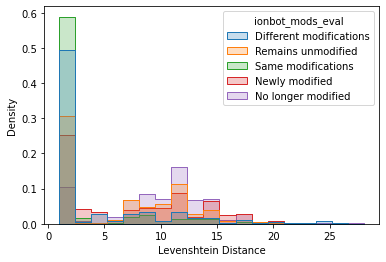

In [221]:
sns.histplot(data=diffseq, x ="Levenshtein Distance", hue="ionbot_mods_eval", stat="density", element="step", common_norm=False)

In [222]:
data["ionbot mass diff"] = data["precursor_mass"] - data["ionbot peptide mass"]
data["comet mass diff"] = data["precursor_mass"] - (data["comet peptide mass"] + (57.021464 * data["Comet Raw Sequence"].str.count("C")))

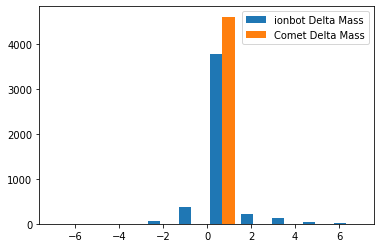

In [223]:
plt.hist([data["ionbot mass diff"], data["comet mass diff"]], label=['ionbot Delta Mass', 'Comet Delta Mass'], bins=10)
plt.legend(loc='upper right')
plt.show()

<Axes: xlabel='ionbot mass diff', ylabel='ionbot PEP'>

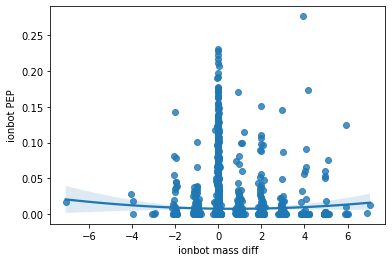

In [224]:
sns.regplot(data=data, x="ionbot mass diff", y="ionbot PEP", order=2)

# Fragger

In [225]:
data = pd.read_csv("fraggervcomet.tsv", sep="\t")
data.columns
data = data.filter(["Spectrum File", "Scan", "precursor_mass", "Fragger Sequence","fragger_mods_formatted", "Comet Raw Sequence", "comet_mods_formatted", "fragger_seq_eval", "fragger_mods_eval", "MSFragger Peptide Mass", "comet peptide mass", "Comet PEP", "Fragger PEP"])

In [226]:
#Same sequence, different modification
ssdm = data[(data["fragger_seq_eval"] == True) & (data["fragger_mods_eval"] == "Different modifications")]
g1 = ssdm.groupby(["comet_mods_formatted", "fragger_mods_formatted"]).count().sort_values("Scan", ascending=False)
g1

,,Spectrum File,Scan,precursor_mass,Fragger Sequence,Comet Raw Sequence,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
comet_mods_formatted,fragger_mods_formatted,,,,,,,,,,,
['carbamidomethyl'],"['carbamidomethyl', 'deamidated']",64,64,64,64,64,64,64,64,64,64,64
['oxidation'],"['deamidated', 'oxidation']",32,32,32,32,32,32,32,32,32,32,32
"['acetyl', 'oxidation']",['carboxymethyl'],29,29,29,29,29,29,29,29,29,29,29
['acetyl'],['carbamyl'],21,21,21,21,21,21,21,21,21,21,21
"['carbamidomethyl', 'oxidation']","['carbamidomethyl', 'deamidated', 'oxidation']",19,19,19,19,19,19,19,19,19,19,19
"['carbamidomethyl', 'deamidated']",['carbamidomethyl'],17,17,17,17,17,17,17,17,17,17,17
['carbamidomethyl'],"['carbamidomethyl', 'didehydro']",15,15,15,15,15,15,15,15,15,15,15
"['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl', 'deamidated']",14,14,14,14,14,14,14,14,14,14,14
['oxidation'],"['amidated', 'oxidation']",12,12,12,12,12,12,12,12,12,12,12


In [227]:
#Same sequence, newly modified
ssnm = data[(data["fragger_seq_eval"] == True) & (data["fragger_mods_eval"] == "Newly modified")]
ssnm.groupby(["fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,Fragger Sequence,Comet Raw Sequence,comet_mods_formatted,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
fragger_mods_formatted,,,,,,,,,,,,
['deamidated'],332,332,332,332,332,0,332,332,332,332,332,332
['amidated'],92,92,92,92,92,0,92,92,92,92,92,92
['didehydro'],43,43,43,43,43,0,43,43,43,43,43,43
['lys->allysine'],42,42,42,42,42,0,42,42,42,42,42,42
['glu->pyro-glu+methyl'],11,11,11,11,11,0,11,11,11,11,11,11


In [228]:
#Same sequence, no longer modified
ssnlm = data[(data["fragger_seq_eval"] == True) & (data["fragger_mods_eval"] == "No longer modified")]
ssnlm.groupby(["comet_mods_formatted"]).count().sort_values("Scan", ascending=False)

,Spectrum File,Scan,precursor_mass,Fragger Sequence,fragger_mods_formatted,Comet Raw Sequence,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
comet_mods_formatted,,,,,,,,,,,,
['deamidated'],58,58,58,58,0,58,58,58,58,58,58,58
['acetyl'],4,4,4,4,0,4,4,4,4,4,4,4
"['acetyl', 'oxidation']",1,1,1,1,0,1,1,1,1,1,1,1
['methyl'],1,1,1,1,0,1,1,1,1,1,1,1


In [229]:
#Different sequence, Different modifications
dsdm = data[(data["fragger_seq_eval"] == False) & (data["fragger_mods_eval"] == "Different modifications")]
dsdm.groupby(["comet_mods_formatted", "fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,,Spectrum File,Scan,precursor_mass,Fragger Sequence,Comet Raw Sequence,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
comet_mods_formatted,fragger_mods_formatted,,,,,,,,,,,
['deamidated'],['arg'],23,23,23,23,23,23,23,23,23,23,23
['methyl'],['acetyl'],16,16,16,16,16,16,16,16,16,16,16
"['carbamidomethyl', 'carbamidomethyl', 'deamidated']","['acetyl', 'carbamidomethyl', 'carbamidomethyl']",15,15,15,15,15,15,15,15,15,15,15
['carbamidomethyl'],['acetyl'],14,14,14,14,14,14,14,14,14,14,14
"['carbamidomethyl', 'carbamidomethyl']","['carbamidomethyl', 'carbamidomethyl', 'dehydrated']",13,13,13,13,13,13,13,13,13,13,13


In [230]:
#Different sequence, Newly modified
dsnm = data[(data["fragger_seq_eval"] == False) & (data["fragger_mods_eval"] == "Newly modified")]
dsnm.groupby(["fragger_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,Fragger Sequence,Comet Raw Sequence,comet_mods_formatted,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
fragger_mods_formatted,,,,,,,,,,,,
['carbamidomethyl'],74,74,74,74,74,0,74,74,74,74,74,74
['formyl'],40,40,40,40,40,0,40,40,40,40,40,40
['acetyl'],31,31,31,31,31,0,31,31,31,31,31,31
['amidated'],22,22,22,22,22,0,22,22,22,22,22,22
['lys'],21,21,21,21,21,0,21,21,21,21,21,21


In [231]:
#Different sequence, no longer modified
dsnlm = data[(data["fragger_seq_eval"] == False) & (data["fragger_mods_eval"] == "No longer modified")]
dsnlm.groupby(["comet_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,Fragger Sequence,fragger_mods_formatted,Comet Raw Sequence,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
comet_mods_formatted,,,,,,,,,,,,
['oxidation'],59,59,59,59,0,59,59,59,59,59,59,59
['carbamidomethyl'],55,55,55,55,0,55,55,55,55,55,55,55
['deamidated'],38,38,38,38,0,38,38,38,38,38,38,38
['methyl'],37,37,37,37,0,37,37,37,37,37,37,37
"['carbamidomethyl', 'carbamidomethyl']",8,8,8,8,0,8,8,8,8,8,8,8


In [232]:
#Different sequence, Remains unmodified
dsru = data[(data["fragger_seq_eval"] == False) & (data["fragger_mods_eval"] == "Remains unmodified")]
dsru.head()

,Spectrum File,Scan,precursor_mass,Fragger Sequence,fragger_mods_formatted,Comet Raw Sequence,comet_mods_formatted,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
2,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,843.5178,843.5178,0.021958,0.0202
13,131023_Sunil_PPT_Brain_A_04,13306.0,1073.62119,MDLVTYFGK,NaN,VPSLVGSFIR,NaN,False,Remains unmodified,1072.5262,1073.6233,0.001300,0.1037
21,131023_Sunil_PPT_Brain_A_04,13964.0,2523.30202,PVFEEPPNPTNVEISLQQMK,NaN,VKPVFEEPPNPTNVEISLQQMK,NaN,False,Remains unmodified,2296.1409,2523.3043,0.000012,0.0014
22,131023_Sunil_PPT_Brain_A_04,14206.0,1273.71775,STISTELALALR,NaN,LLVVYPWTQR,NaN,False,Remains unmodified,1273.7241,1273.7183,0.000414,0.0048
24,131023_Sunil_PPT_Brain_A_04,14490.0,1333.79307,GLIPQLIGVAPEK,NaN,GLLPQLLGVAPEK,NaN,False,Remains unmodified,1333.7969,1333.7969,0.000140,0.0042


In [233]:
#Different sequence, same modifications
dssm = data[(data["fragger_seq_eval"] == False) & (data["fragger_mods_eval"] == "Same modifications")]
dssm.head()

,Spectrum File,Scan,precursor_mass,Fragger Sequence,fragger_mods_formatted,Comet Raw Sequence,comet_mods_formatted,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP
3,131023_Sunil_PPT_Brain_A_03,11608.0,1632.81395,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.8141,1575.7926,0.067464,0.0120
58,131023_Sunil_PPT_Brain_A_04,19072.0,1872.92595,MAVTFIGNSTAIQELFK,['oxidation'],MASTFIGNSTAIQELFK,['oxidation'],False,Same modifications,1884.9655,1872.9242,0.000011,0.0244
59,131023_Sunil_PPT_Brain_A_04,19097.0,2435.19742,FGSYCPTTCGIADFLSTYQTK,"['carbamidomethyl', 'carbamidomethyl']",VLDALFPCVQGGTTAIPGAFGCGK,"['carbamidomethyl', 'carbamidomethyl']",False,Same modifications,2416.0715,2321.1548,0.001256,0.0055
73,131023_Sunil_PPT_Brain_A_04,5861.0,1632.81894,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.8141,1575.7926,0.000066,0.0001
88,131023_Sunil_PPT_Brain_A_05,11092.0,1632.81186,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1632.8141,1575.7926,0.000003,0.0000


In [234]:
data["Levenshtein Distance"] = data.progress_apply(lambda x: levenshtein_distance(x["Fragger Sequence"], x["Comet Raw Sequence"]), axis=1)

100%|██████████| 2412/2412 [00:00<00:00, 6339.85it/s]


In [235]:
diffseq = data[data["fragger_seq_eval"] == False]
diffseq.groupby("fragger_mods_eval").count().reset_index()

,fragger_mods_eval,Spectrum File,Scan,precursor_mass,Fragger Sequence,fragger_mods_formatted,Comet Raw Sequence,comet_mods_formatted,fragger_seq_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP,Levenshtein Distance
0,Different modifications,312,312,312,312,312,312,312,312,312,312,312,312,312
1,Newly modified,366,366,366,366,366,366,0,366,366,366,366,366,366
2,No longer modified,237,237,237,237,0,237,237,237,237,237,237,237,237
3,Remains unmodified,461,461,461,461,0,461,0,461,461,461,461,461,461
4,Same modifications,97,97,97,97,97,97,97,97,97,97,97,97,97


<Axes: xlabel='Levenshtein Distance', ylabel='Density'>

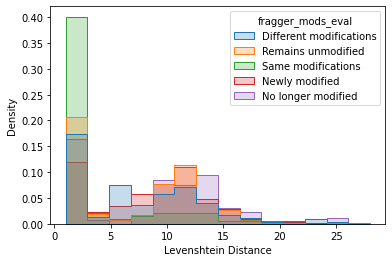

In [236]:
sns.histplot(data=diffseq, x ="Levenshtein Distance", hue="fragger_mods_eval", stat="density", element="step", common_norm=False)

In [237]:
data.columns

Index(['Spectrum File', 'Scan', 'precursor_mass', 'Fragger Sequence',
       'fragger_mods_formatted', 'Comet Raw Sequence', 'comet_mods_formatted',
       'fragger_seq_eval', 'fragger_mods_eval', 'MSFragger Peptide Mass',
       'comet peptide mass', 'Comet PEP', 'Fragger PEP',
       'Levenshtein Distance'],
      dtype='object')

In [238]:
data["MSFragger mass diff"] = data["precursor_mass"] - data["MSFragger Peptide Mass"]
data["comet mass diff"] = data["precursor_mass"] - (data["comet peptide mass"] + (57.021464 * data["Comet Raw Sequence"].str.count("C")))

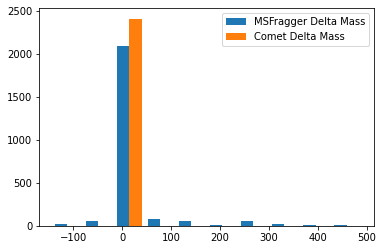

In [239]:
plt.hist([data["MSFragger mass diff"], data["comet mass diff"]], label=['MSFragger Delta Mass', 'Comet Delta Mass'], bins=10)
plt.legend(loc='upper right')
plt.show()

In [240]:
data["MSFragger mass diff"].describe()

count    2412.000000
mean       19.931059
std        66.114909
min      -144.038120
25%        -0.001350
50%         0.983080
75%         4.901710
max       490.172220
Name: MSFragger mass diff, dtype: float64

In [241]:
data.sort_values("MSFragger mass diff", ascending=False)

,Spectrum File,Scan,precursor_mass,Fragger Sequence,fragger_mods_formatted,Comet Raw Sequence,comet_mods_formatted,fragger_seq_eval,fragger_mods_eval,MSFragger Peptide Mass,comet peptide mass,Comet PEP,Fragger PEP,Levenshtein Distance,MSFragger mass diff,comet mass diff
932,131121_Sunil_Prot_BrainAmine_AProfile_04,14014.0,3333.62242,THTCPPCPAPELLGGPSVFLFPPKPK,"['carbamidomethyl', 'carbamidomethyl']",SCDKTHTCPPCPAPELLGGPSVFLFPPKPK,"['carbamidomethyl', 'carbamidomethyl', 'carbam...",False,Different modifications,2843.4502,3162.5704,1.878510e-04,0.0000,4,490.17222,-0.012372
1284,131121_Sunil_Prot_BrainAmine_AProfile_05,8598.0,1502.68332,DVNAAIATIK,NaN,GYYYNGDSAGLPAR,NaN,False,Remains unmodified,1014.5709,1502.6790,1.838828e-02,0.1232,12,488.11242,0.004320
1111,131121_Sunil_Prot_BrainAmine_AProfile_04,6626.0,1886.97015,GALQNIIPASTGAAK,NaN,VTHAVVTVPAYFNDAQR,NaN,False,Remains unmodified,1410.7830,1886.9639,1.394696e-04,0.0381,14,476.18715,0.006250
1989,131121_Sunil_Prot_BrainAmine_AProfile_13,5346.0,2497.11952,TTRTPDTSTYCYETAEK,['carbamidomethyl'],DESASETSTPSEHSAAPSPQVEVR,NaN,False,Newly modified,2022.8840,2497.1204,2.679551e-03,0.0015,19,474.23552,-0.000880
2294,131121_Sunil_Prot_BrainAmine_AProfile_18,12371.0,2893.34590,EEIPEEELNEDVEEIDHAER,NaN,LTQKEEIPEEELNEDVEEIDHAER,NaN,False,Remains unmodified,2423.0610,2893.3464,4.484897e-04,0.0622,4,470.28490,-0.000500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,131121_Sunil_Prot_BrainAmine_AProfile_14,7350.0,1907.88828,CDIQMTQSPSTLSASVGDR,['carbamidomethyl'],DIQMTQSPSTLSASVGDR,['oxidation'],False,Different modifications,2051.9253,1907.8845,5.796417e-05,0.0064,1,-144.03702,0.003780
2002,131121_Sunil_Prot_BrainAmine_AProfile_13,7475.0,1907.88816,CDIQMTQSPSTLSASVGDR,['carbamidomethyl'],DIQMTQSPSTLSASVGDR,['oxidation'],False,Different modifications,2051.9253,1907.8845,7.273629e-07,0.0082,1,-144.03714,0.003660
284,131023_Sunil_PPT_Brain_A_12,6462.0,1907.88767,CDIQMTQSPSTLSASVGDR,['carbamidomethyl'],DIQMTQSPSTLSASVGDR,['oxidation'],False,Different modifications,2051.9253,1907.8845,1.092695e-06,0.0094,1,-144.03763,0.003170
285,131023_Sunil_PPT_Brain_A_12,6570.0,1907.88730,CDIQMTQSPSTLSASVGDR,['carbamidomethyl'],DIQMTQSPSTLSASVGDR,['oxidation'],False,Different modifications,2051.9253,1907.8845,1.241708e-06,0.0069,1,-144.03800,0.002800


<Axes: xlabel='MSFragger mass diff', ylabel='Fragger PEP'>

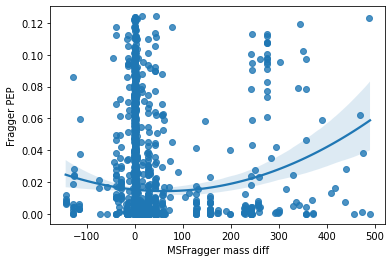

In [242]:
sns.regplot(data=data, x="MSFragger mass diff", y="Fragger PEP", order=2)

# pFind

In [243]:
data = pd.read_csv("pfindvcomet.tsv", sep="\t")
data.columns
data = data.filter(["Spectrum File", "Scan", "precursor_mass", "pFind Sequence","pfind_mods_formatted", "Comet Raw Sequence", "comet_mods_formatted", "pfind_seq_eval", "pfind_mods_eval", "pFind Peptide Mass", "comet peptide mass", "pFind q-value"])

In [244]:
#Same sequence, different modification
ssdm = data[(data["pfind_seq_eval"] == True) & (data["pfind_mods_eval"] == "Different modifications")]
g1 = ssdm.groupby(["comet_mods_formatted", "pfind_mods_formatted"]).count().sort_values("Scan", ascending=False)
g1.head()

,,Spectrum File,Scan,precursor_mass,pFind Sequence,Comet Raw Sequence,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
comet_mods_formatted,pfind_mods_formatted,,,,,,,,,,
"['carbamidomethyl', 'methyl']",['propionamide'],305,305,305,305,305,305,305,305,305,305
['acetyl'],['acetyl[s](ser->glu'],83,83,83,83,83,83,83,83,83,83
['carbamidomethyl'],"['carbamidomethyl', 'deamidated']",48,48,48,48,48,48,48,48,48,48
['oxidation'],"['deamidated', 'oxidation']",30,30,30,30,30,30,30,30,30,30
['acetyl'],['carbamyl'],27,27,27,27,27,27,27,27,27,27


In [245]:
#Same sequence, newly modified
ssnm = data[(data["pfind_seq_eval"] == True) & (data["pfind_mods_eval"] == "Newly modified")]
ssnm.groupby(["pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,pFind Sequence,Comet Raw Sequence,comet_mods_formatted,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
pfind_mods_formatted,,,,,,,,,,,
['deamidated'],322,322,322,322,322,0,322,322,322,322,322
['didehydro'],1,1,1,1,1,0,1,1,1,1,1
['glu->pyro-glu+methyl_2h(2)13c(1)'],1,1,1,1,1,0,1,1,1,1,1


In [246]:
#Same sequence, no longer modified
ssnlm = data[(data["pfind_seq_eval"] == True) & (data["pfind_mods_eval"] == "No longer modified")]
ssnlm.groupby(["comet_mods_formatted"]).count().sort_values("Scan", ascending=False)

,Spectrum File,Scan,precursor_mass,pFind Sequence,pfind_mods_formatted,Comet Raw Sequence,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
comet_mods_formatted,,,,,,,,,,,
['deamidated'],29,29,29,29,0,29,29,29,29,29,29


In [247]:
#Different sequence, Different modifications
dsdm = data[(data["pfind_seq_eval"] == False) & (data["pfind_mods_eval"] == "Different modifications")]
dsdm.groupby(["comet_mods_formatted", "pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

Spectrum File  \
comet_mods_formatted                               pfind_mods_formatted                                              
['carbamidomethyl', 'carbamidomethyl', 'deamida... ['acetyl', 'carbamidomethyl', 'carbamidomethyl']             16   
['methyl']                                         ['acetyl']                                                   16   
['oxidation']                                      ['methyl', 'oxidation']                                      14   
                                                   ['formyl']                                                   11   
['acetyl', 'carbamidomethyl']                      ['carbamidomethyl', 'tyr->glu']                               7   

                                                                                                     Scan  \
comet_mods_formatted                               pfind_mods_formatted                                     
['carbamidomethyl', 'carbamidomethyl', 'deamida... ['acetyl', 'carbamidomethyl', 'carbamidomethyl']    16   
['methyl']                                         ['acetyl']                                          16   
['oxidation']                                      ['methyl', 'oxidation']                             14   
                                                   ['formyl']                                          11   
['acetyl', 'carbamidomethyl']                      ['carbamidomethyl', 'tyr->glu']                      7   

                                                                                                     precursor_mass  \
comet_mods_formatted                               pfind_mods_formatted                                               
['carbamidomethyl', 'carbamidomethyl', 'deamida... ['acetyl', 'carbamidomethyl', 'carbamidomethyl']              16   
['methyl']                                         ['acetyl']                                                    16   
['oxidation']                                      ['methyl', 'oxidation']                                       14   
                                                   ['formyl']                                                    11   
['acetyl', 'carbamidomethyl']                      ['carbamidomethyl', 'tyr->glu']                                7   

                                                                                                     pFind Sequence  \
comet_mods_formatted                               pfind_mods_formatted                                               
['carbamidomethyl', 'carbamidomethyl', 'deamida... ['acetyl', 'carbamidomethyl', 'carbamidomethyl']              16   
['methyl']                                         ['acetyl']                                                    16   
['oxidation']                                      ['methyl', 'oxidation']                                       14   
                                                   ['formyl']                                                    11   
['acetyl', 'carbamidomethyl']                      ['carbamidomethyl', 'tyr->glu']                                7   

                                                                                                     Comet Raw Sequence  \
comet_mods_formatted                               pfind_mods_formatted                                                   
['carbamidomethyl', 'carbamidomethyl', 'deamida... ['acetyl', 'carbamidomethyl', 'carbamidomethyl']                  16   
['methyl']                                         ['acetyl']                                                        16   
['oxidation']                                      ['methyl', 'oxidation']                                           14   
                                                   ['formyl']                                                        11   
['acetyl', 'carbamidomethyl']                      ['carbamidomethyl', 'tyr->glu']                      

In [248]:
#Different sequence, Newly modified
dsnm = data[(data["pfind_seq_eval"] == False) & (data["pfind_mods_eval"] == "Newly modified")]
dsnm.groupby(["pfind_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,pFind Sequence,Comet Raw Sequence,comet_mods_formatted,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
pfind_mods_formatted,,,,,,,,,,,
['formyl'],77,77,77,77,77,0,77,77,77,77,77
['carbamidomethyl'],73,73,73,73,73,0,73,73,73,73,73
['acetyl'],53,53,53,53,53,0,53,53,53,53,53
['gln->pyro-glu'],25,25,25,25,25,0,25,25,25,25,25
['oxidation'],25,25,25,25,25,0,25,25,25,25,25


In [249]:
#Different sequence, no longer modified
dsnlm = data[(data["pfind_seq_eval"] == False) & (data["pfind_mods_eval"] == "No longer modified")]
dsnlm.groupby(["comet_mods_formatted"]).count().sort_values("Scan", ascending=False).head()

,Spectrum File,Scan,precursor_mass,pFind Sequence,pfind_mods_formatted,Comet Raw Sequence,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
comet_mods_formatted,,,,,,,,,,,
['carbamidomethyl'],65,65,65,65,0,65,65,65,65,65,65
['methyl'],37,37,37,37,0,37,37,37,37,37,37
['oxidation'],19,19,19,19,0,19,19,19,19,19,19
"['carbamidomethyl', 'carbamidomethyl']",6,6,6,6,0,6,6,6,6,6,6
['deamidated'],4,4,4,4,0,4,4,4,4,4,4


In [250]:
#Different sequence, Remains unmodified
dsru = data[(data["pfind_seq_eval"] == False) & (data["pfind_mods_eval"] == "Remains unmodified")]
dsru.head()

,Spectrum File,Scan,precursor_mass,pFind Sequence,pfind_mods_formatted,Comet Raw Sequence,comet_mods_formatted,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
1,131023_Sunil_PPT_Brain_A_03,11225.0,843.51658,LGVTVLSR,NaN,IGVTVLSR,NaN,False,Remains unmodified,844.525036,843.5178,0.0
7,131023_Sunil_PPT_Brain_A_04,10936.0,1348.72507,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1349.734413,1348.7272,0.0
9,131023_Sunil_PPT_Brain_A_04,10985.0,979.64109,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,980.650229,979.6430,0.0
11,131023_Sunil_PPT_Brain_A_04,11309.0,1348.72336,TLTLVDTGIGMTK,NaN,TLTIVDTGIGMTK,NaN,False,Remains unmodified,1349.734413,1348.7272,0.0
12,131023_Sunil_PPT_Brain_A_04,11975.0,979.64017,VNIIPLIAK,NaN,VNIIPIIAK,NaN,False,Remains unmodified,980.650229,979.6430,0.0


In [251]:
#Different sequence, same modifications
dssm = data[(data["pfind_seq_eval"] == False) & (data["pfind_mods_eval"] == "Same modifications")]
dssm.head()

,Spectrum File,Scan,precursor_mass,pFind Sequence,pfind_mods_formatted,Comet Raw Sequence,comet_mods_formatted,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value
2,131023_Sunil_PPT_Brain_A_03,11608.0,1632.81395,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1633.821321,1575.7926,0.003659
68,131023_Sunil_PPT_Brain_A_04,5861.0,1632.81894,VNQIGSVTESLQACK,['carbamidomethyl'],VNQIGSVTESIQACK,['carbamidomethyl'],False,Same modifications,1633.821321,1575.7926,0.000000
75,131023_Sunil_PPT_Brain_A_04,7524.0,1364.72959,TLTLVDTGIGMTK,['oxidation'],TLTIVDTGIGMTK,['oxidation'],False,Same modifications,1365.729328,1364.7172,0.000000
119,131023_Sunil_PPT_Brain_A_05,8892.0,1821.91462,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1822.922757,1764.8941,0.000000
120,131023_Sunil_PPT_Brain_A_05,9018.0,1821.91552,EIVHIQAGQCGNQIGAK,['carbamidomethyl'],EIVHLQAGQCGNQIGAK,['carbamidomethyl'],False,Same modifications,1822.922757,1764.8941,0.000000


In [252]:
data["Levenshtein Distance"] = data.progress_apply(lambda x: levenshtein_distance(x["pFind Sequence"], x["Comet Raw Sequence"]), axis=1)

100%|██████████| 2498/2498 [00:00<00:00, 7432.90it/s]


In [253]:
diffseq = data[data["pfind_seq_eval"] == False]

In [254]:
diffseq = data[data["pfind_seq_eval"] == False]
diffseq.groupby("pfind_mods_eval").count().reset_index()

,pfind_mods_eval,Spectrum File,Scan,precursor_mass,pFind Sequence,pfind_mods_formatted,Comet Raw Sequence,comet_mods_formatted,pfind_seq_eval,pFind Peptide Mass,comet peptide mass,pFind q-value,Levenshtein Distance
0,Different modifications,247,247,247,247,247,247,247,247,247,247,247,247
1,Newly modified,419,419,419,419,419,419,0,419,419,419,419,419
2,No longer modified,146,146,146,146,0,146,146,146,146,146,146,146
3,Remains unmodified,534,534,534,534,0,534,0,534,534,534,534,534
4,Same modifications,124,124,124,124,124,124,124,124,124,124,124,124


<Axes: xlabel='Levenshtein Distance', ylabel='Density'>

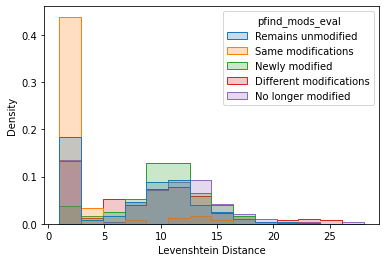

In [255]:
sns.histplot(data=diffseq, x ="Levenshtein Distance", hue="pfind_mods_eval", stat="density", element="step", common_norm=False)

In [256]:
data["pFind mass diff"] = data["precursor_mass"] - data["pFind Peptide Mass"]
data["comet mass diff"] = data["precursor_mass"] - (data["comet peptide mass"] + (57.021464 * data["Comet Raw Sequence"].str.count("C")))

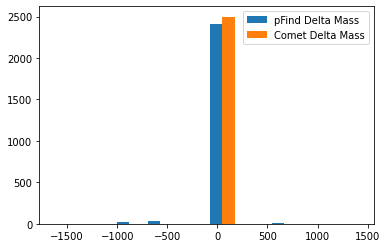

In [257]:
plt.hist([data["pFind mass diff"], data["comet mass diff"]], label=['pFind Delta Mass', 'Comet Delta Mass'], bins=10)
plt.legend(loc='upper right')
plt.show()

In [258]:
data.sort_values("pFind mass diff", ascending=False)

,Spectrum File,Scan,precursor_mass,pFind Sequence,pfind_mods_formatted,Comet Raw Sequence,comet_mods_formatted,pfind_seq_eval,pfind_mods_eval,pFind Peptide Mass,comet peptide mass,pFind q-value,Levenshtein Distance,pFind mass diff,comet mass diff
1633,131121_Sunil_Prot_BrainAmine_AProfile_11,16052.0,2891.41350,GFSVVADTPELQR,['formyl'],AQGPAASAEEPKPVEAPAANSDQTVTVKE,NaN,False,Newly modified,1446.722269,2891.4148,0.002118,23,1444.691231,-0.001300
2375,131121_Sunil_Prot_BrainAmine_AProfile_18,14477.0,2960.28713,NGFDQCDYGWLSDASVR,"['ammonia-loss', 'carbamidomethyl']",KPEDWDEEMDGEWEPPVIQNPEYK,NaN,False,Newly modified,1972.812934,2959.2858,0.000000,21,987.474196,1.001330
1041,131121_Sunil_Prot_BrainAmine_AProfile_04,20992.0,2514.37222,SAPLIADQAVLQLLPK,NaN,VETGVLKPGMVVTFAPVNVTTEVK,NaN,False,Remains unmodified,1676.994451,2514.3767,0.000000,20,837.377769,-0.004480
2403,131121_Sunil_Prot_BrainAmine_AProfile_18,8382.0,2512.99312,DSLYVDGDCTMDIR,"['carbamidomethyl', 'oxidation']",ASETEENGSDSFMHSMDPQLER,['oxidation'],False,Different modifications,1675.693742,2512.0069,0.000000,16,837.299378,0.986220
2376,131121_Sunil_Prot_BrainAmine_AProfile_18,15315.0,2380.04722,SIQFVDWCPTGFK,['carbamidomethyl'],EEIPEEELAEDVEEIDHAER,NaN,False,Newly modified,1584.751460,2380.0553,0.000000,18,795.295760,-0.008080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,131121_Sunil_Prot_BrainAmine_AProfile_18,9210.0,1839.78415,EGVQKEDIPPADLSDQVPDTESETR,NaN,EAVCIVLSDDTCSDEK,"['carbamidomethyl', 'carbamidomethyl']",False,No longer modified,2755.290326,1725.7437,0.000000,16,-915.506176,-0.002478
1013,131121_Sunil_Prot_BrainAmine_AProfile_04,18031.0,1874.98815,LTTPTYGDLNHLVSATMSGVTTCLR,"['carbamidomethyl', 'methylmalonylation']",VTLTCVAPLSGVDFQLR,['carbamidomethyl'],False,Different modifications,2808.354131,1817.9709,0.000027,16,-933.365981,-0.004214
1701,131121_Sunil_Prot_BrainAmine_AProfile_11,22435.0,1895.97031,VQAENDFGKGPEPESVIGYSGEDYPR,NaN,IIPGADADVVVWDPEATK,NaN,False,Remains unmodified,2840.300832,1894.9676,0.000000,23,-944.330522,1.002710
2468,131121_Sunil_Prot_BrainAmine_AProfile_21,8934.0,1293.70322,VHTECCHGDLLECADDRADLAK,"['carbamidomethyl', 'carbamidomethyl', 'carbam...",NVNQSLLELHK,NaN,False,Newly modified,2585.117621,1293.7041,0.008365,17,-1291.414401,-0.000880


<Axes: xlabel='pFind mass diff', ylabel='pFind q-value'>

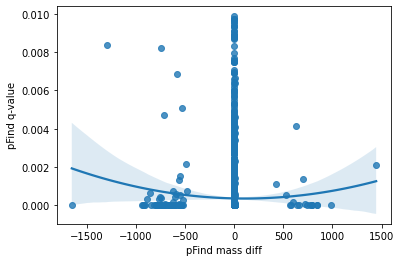

In [259]:
sns.regplot(data=data, x="pFind mass diff", y="pFind q-value", order=2)